# positive correlations between social activities and life satisfaction

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
    na_values=["9999", "", " ", "Presented but no response", "NA"],
    low_memory=False
)

# Activity and wellness variables
social_activities = [
    "CONNECTION_activities_greeted_neighbour_or_stranger_pm",
    "CONNECTION_activities_group_exercise_pm",
    "CONNECTION_activities_helped_pm",
    "CONNECTION_activities_hug_pm",
    "CONNECTION_activities_kissed_pm",
    "CONNECTION_activities_visited_family_pm",
    "CONNECTION_activities_visited_friends_pm",
    "CONNECTION_activities_new_friend_pm"
]
wellness_variable = "WELLNESS_life_satisfaction"

# Select relevant columns
selected_columns = social_activities + [wellness_variable]
data_selected = data[selected_columns]

# Drop rows with missing values
data_cleaned = data_selected.dropna()

# Reset index after dropping rows
data_cleaned.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned data
print(data_cleaned.head())


  CONNECTION_activities_greeted_neighbour_or_stranger_pm  \
0                                                Yes       
1                                                Yes       
2                                                Yes       
3                                                Yes       
4                                                Yes       

  CONNECTION_activities_group_exercise_pm CONNECTION_activities_helped_pm  \
0                                      No                             Yes   
1                                      No                              No   
2                                      No                             Yes   
3                                      No                             Yes   
4                                     Yes                             Yes   

  CONNECTION_activities_hug_pm CONNECTION_activities_kissed_pm  \
0                          Yes                              No   
1                          Yes              

In [2]:
# Safely map "Yes" to 1 and "No" to 0
for activity in social_activities:
    data_cleaned.loc[:, activity] = data_cleaned[activity].map({"Yes": 1, "No": 0})

# Check if all values have been converted
print(data_cleaned.head())


  CONNECTION_activities_greeted_neighbour_or_stranger_pm  \
0                                                  1       
1                                                  1       
2                                                  1       
3                                                  1       
4                                                  1       

  CONNECTION_activities_group_exercise_pm CONNECTION_activities_helped_pm  \
0                                       0                               1   
1                                       0                               0   
2                                       0                               1   
3                                       0                               1   
4                                       1                               1   

  CONNECTION_activities_hug_pm CONNECTION_activities_kissed_pm  \
0                            1                               0   
1                            1              

In [3]:
# Create a combined social activity score
data_cleaned['Combined_Social_Activity'] = data_cleaned[social_activities].sum(axis=1)

# Display the first few rows to verify the combined column
print(data_cleaned[['Combined_Social_Activity', 'WELLNESS_life_satisfaction']].head())


  Combined_Social_Activity  WELLNESS_life_satisfaction
0                        5                         2.0
1                        5                         7.0
2                        6                         5.0
3                        7                         4.0
4                        8                         8.0


/tmp/ipykernel_152/3398762607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Combined_Social_Activity'] = data_cleaned[social_activities].sum(axis=1)


/tmp/ipykernel_152/750559758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Combined_Social_Activity"] = pd.to_numeric(data_cleaned["Combined_Social_Activity"], errors="coerce")
/tmp/ipykernel_152/750559758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["WELLNESS_life_satisfaction"] = pd.to_numeric(data_cleaned["WELLNESS_life_satisfaction"], errors="coerce")


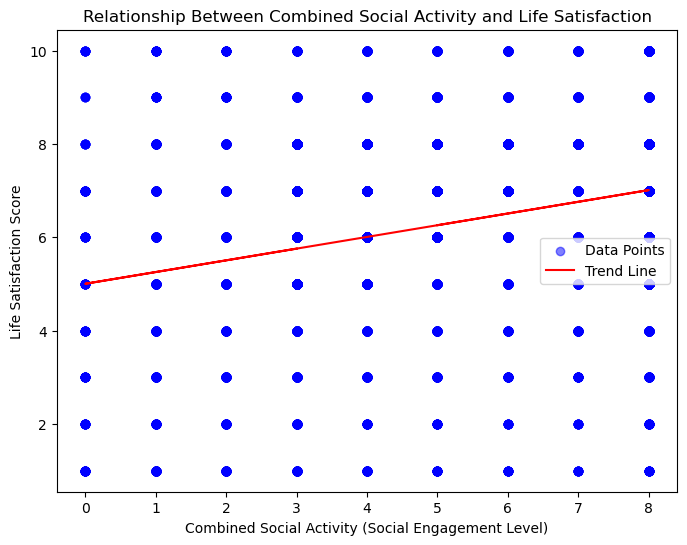

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure numeric data types for the columns
data_cleaned["Combined_Social_Activity"] = pd.to_numeric(data_cleaned["Combined_Social_Activity"], errors="coerce")
data_cleaned["WELLNESS_life_satisfaction"] = pd.to_numeric(data_cleaned["WELLNESS_life_satisfaction"], errors="coerce")

# Drop rows with NaN values
data_cleaned = data_cleaned.dropna(subset=["Combined_Social_Activity", "WELLNESS_life_satisfaction"])

# Scatter plot with trend line
plt.figure(figsize=(8, 6))
plt.scatter(
    data_cleaned["Combined_Social_Activity"],
    data_cleaned["WELLNESS_life_satisfaction"],
    color="blue",
    alpha=0.5,
    label="Data Points"
)

# Add a trend line
z = np.polyfit(
    data_cleaned["Combined_Social_Activity"],
    data_cleaned["WELLNESS_life_satisfaction"],
    1
)
p = np.poly1d(z)
plt.plot(
    data_cleaned["Combined_Social_Activity"],
    p(data_cleaned["Combined_Social_Activity"]),
    color="red",
    label="Trend Line"
)

# Titles and labels
plt.title("Relationship Between Combined Social Activity and Life Satisfaction")
plt.xlabel("Combined Social Activity (Social Engagement Level)")
plt.ylabel("Life Satisfaction Score")
plt.legend()
plt.show()


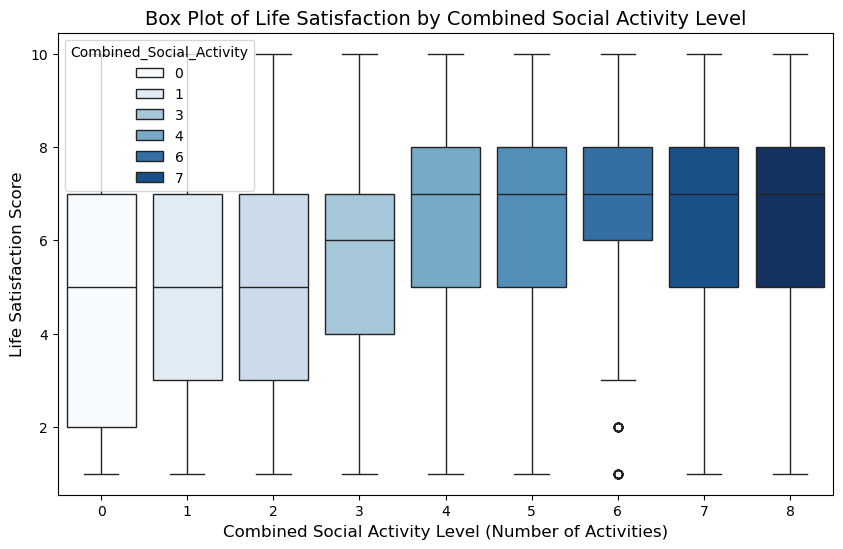

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Combined_Social_Activity",
    y="WELLNESS_life_satisfaction",
    data=data_cleaned,
    palette="Blues",
    hue="Combined_Social_Activity", 
    dodge=False
)


# Set titles and labels
plt.title("Box Plot of Life Satisfaction by Combined Social Activity Level", fontsize=14)
plt.xlabel("Combined Social Activity Level (Number of Activities)", fontsize=12)
plt.ylabel("Life Satisfaction Score", fontsize=12)

# Show the plot
plt.show()


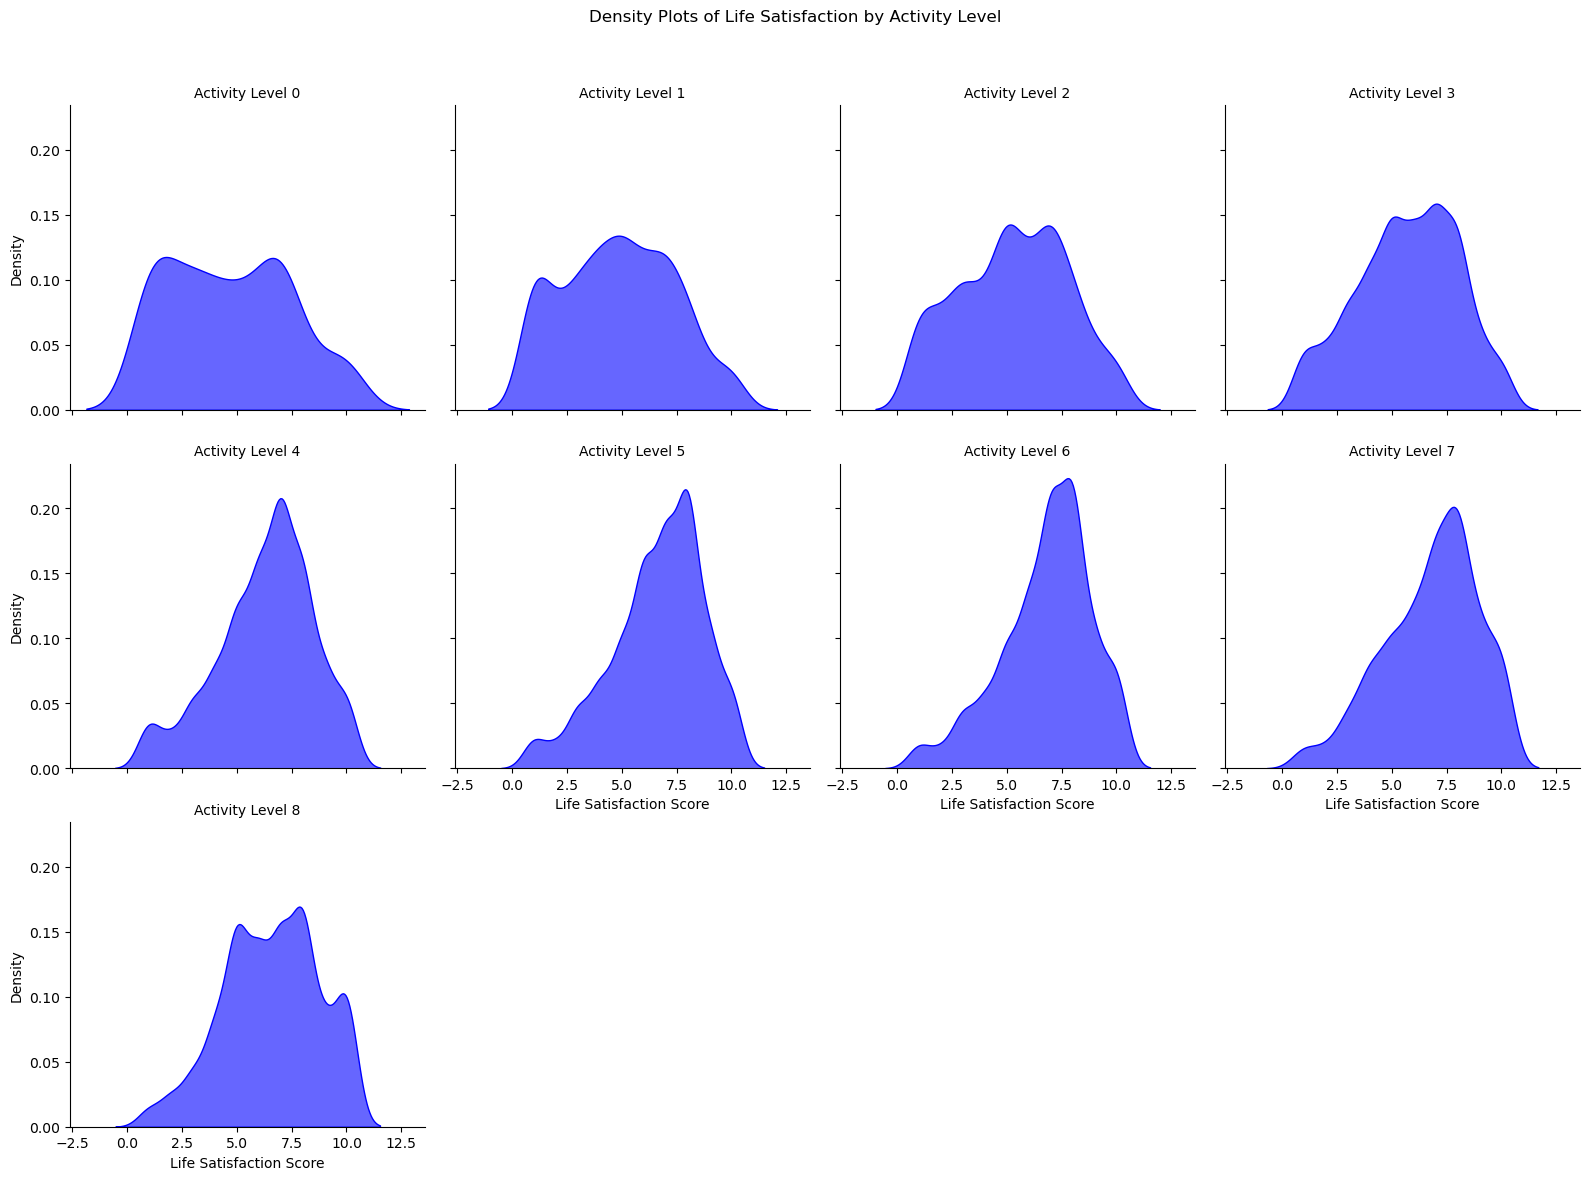

In [6]:
g = sns.FacetGrid(data_cleaned, col="Combined_Social_Activity", col_wrap=4, height=4)
g.map(sns.kdeplot, "WELLNESS_life_satisfaction", fill=True, color="blue", alpha=0.6)
g.set_titles("Activity Level {col_name}")
g.set_axis_labels("Life Satisfaction Score", "Density")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Density Plots of Life Satisfaction by Activity Level")
plt.show()


/tmp/ipykernel_152/604357756.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_satisfaction = data_cleaned.groupby(["Combined_Social_Activity", "Satisfaction_Bin"]).size().unstack()


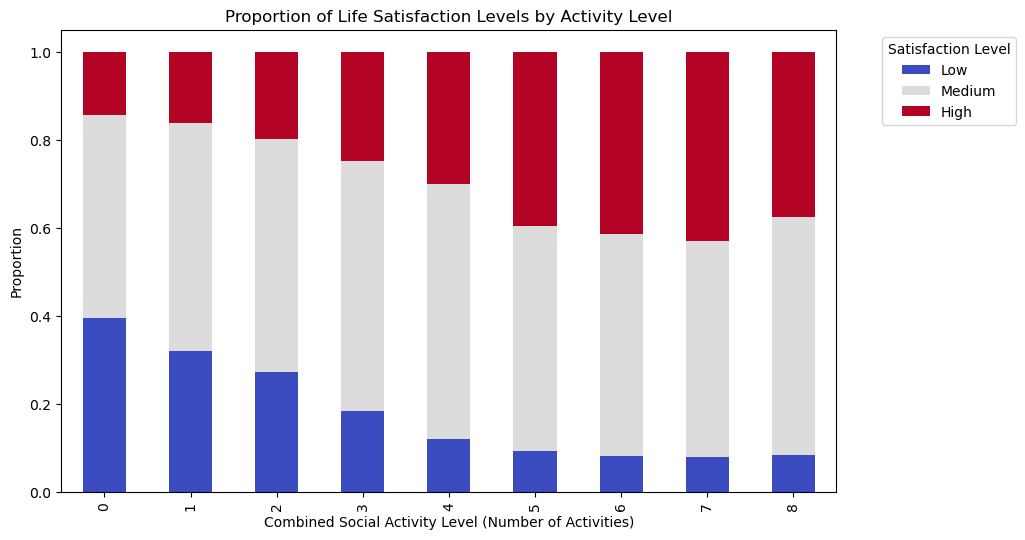

In [7]:
# Create bins for life satisfaction scores
data_cleaned["Satisfaction_Bin"] = pd.cut(
    data_cleaned["WELLNESS_life_satisfaction"],
    bins=[0, 3, 7, 10],
    labels=["Low", "Medium", "High"]
)

# Count proportions for each group
activity_satisfaction = data_cleaned.groupby(["Combined_Social_Activity", "Satisfaction_Bin"]).size().unstack()
activity_satisfaction = activity_satisfaction.div(activity_satisfaction.sum(axis=1), axis=0)

# Plot stacked bar chart
activity_satisfaction.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="coolwarm"
)
plt.title("Proportion of Life Satisfaction Levels by Activity Level")
plt.xlabel("Combined Social Activity Level (Number of Activities)")
plt.ylabel("Proportion")
plt.legend(title="Satisfaction Level", bbox_to_anchor=(1.05, 1))
plt.show()


In [8]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = data_cleaned["Combined_Social_Activity"]
y = data_cleaned["WELLNESS_life_satisfaction"]

# Add a constant to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.059
Model:                                    OLS   Adj. R-squared:                  0.059
Method:                         Least Squares   F-statistic:                     565.6
Date:                        Sat, 23 Nov 2024   Prob (F-statistic):          2.68e-121
Time:                                23:07:44   Log-Likelihood:                -20030.
No. Observations:                        8972   AIC:                         4.006e+04
Df Residuals:                            8970   BIC:                         4.008e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

1. **Model Fit**:
   - **R-squared**: 0.059 indicates that **5.9%** of the variability in life satisfaction is explained by the combined social activity levels. While this is a relatively small proportion, it suggests some degree of association.
   - **F-statistic**: 565.6 with a very low p-value (**2.68e-121**) confirms that the model is statistically significant.

2. **Coefficients**:
   - **Intercept (const)**: 5.006. This is the estimated life satisfaction score for individuals with no reported social activity.
   - **Combined Social Activity (coef)**: 0.251. For each additional unit of combined social activity (e.g., engaging in one more social activity), the life satisfaction score increases on average by 0.251 points. This is statistically significant with a p-value of 0.000.

3. **Significance**:
   - The low p-value for the combined social activity variable indicates that the relationship between combined social activity and life satisfaction is statistically significant.

### Project Summary: The Relationship Between Social Activities and Life Satisfaction

---

#### **Objective**
The objective of this project was to investigate whether engaging in various social activities is associated with higher levels of life satisfaction. The study focused on individuals' participation in eight types of social activities and their reported life satisfaction scores. By combining these activities into a single "social engagement" score, we aimed to analyze how increased social engagement correlates with life satisfaction.

---

#### **Hypotheses**

1. **Null Hypothesis (\(H_0\))**: There is no significant relationship between the combined level of social activities and life satisfaction. The frequency of engaging in social activities does not impact life satisfaction scores.
   
2. **Alternative Hypothesis (\(H_1\))**: There is a significant positive relationship between the combined level of social activities and life satisfaction. Higher social engagement levels are associated with greater life satisfaction.

---

#### **Methodology**

1. **Dataset**:
   - Data was drawn from a publicly available dataset containing social activity variables and wellness indicators, specifically life satisfaction scores.
   - Eight social activity variables were selected, including activities like visiting friends and family, greeting neighbors, and forming new friendships.

2. **Key Variables**:
   - **Independent Variable**: Combined Social Activity Level, calculated by summing binary indicators (Yes=1, No=0) for the eight selected social activities.
   - **Dependent Variable**: Life satisfaction, measured on a scale from 0 to 10.

3. **Analysis Methods**:
   - **Scatter Plot**: Visualized the relationship between combined social activity levels and life satisfaction, with a fitted trend line.
   - **Box Plot**: Compared the distribution of life satisfaction scores across different levels of combined social activity.
   - **Density Plot**: Explored the distribution of life satisfaction scores at each level of social engagement.
   - **Proportional Bar Plot**: Displayed the proportion of low, medium, and high life satisfaction scores across activity levels.
   - **Linear Regression**: Assessed the strength and significance of the relationship between social activity levels and life satisfaction.

---

#### **Results**

1. **Descriptive Insights**:
   - Higher levels of social activity were generally associated with higher median life satisfaction scores.
   - Density and box plots indicated that individuals with more social activities tended to cluster around higher life satisfaction scores.

2. **Regression Analysis**:
   - **R-squared**: 0.059 indicates that 5.9% of the variability in life satisfaction is explained by combined social activity levels.
   - **Coefficient (Social Activities)**: 0.251, suggesting that each additional social activity is associated with an average increase of 0.251 in life satisfaction.
   - The model was statistically significant (\(p < 0.000\)), rejecting the null hypothesis.

3. **Visualization Insights**:
   - Scatter plots showed a modest upward trend, supporting the hypothesis of a positive relationship.
   - Box plots and density plots demonstrated increasing life satisfaction scores with higher levels of combined social activity.
   - Proportional bar plots revealed that individuals with higher activity levels were more likely to report high life satisfaction scores.

---

#### **Conclusion**

The findings suggest that engaging in more social activities is positively associated with life satisfaction. Although the effect size is modest, the results are statistically significant, and the analysis supports rejecting the null hypothesis in favor of the alternative hypothesis. 